# ObsID : 0945030131, SRCNUM : 7, Instru : EMOS2
Not on Simbad

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [2]:
Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945030131_SRCNUM7_EMOS2_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.787e-03 +/- 6.825e-04 (77.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.4e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945030131_SRCNUM7_EMOS2_background_spectrum.fits
  Background Exposure Time: 1.398e+04 sec
 Using Response (RMF) File            ObsID0945030131_SRCNUM7_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945030131_SRCNUM7_EMOS2.arf



## Plot spectrum

In [3]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 856.5, 661.5, -0.5)

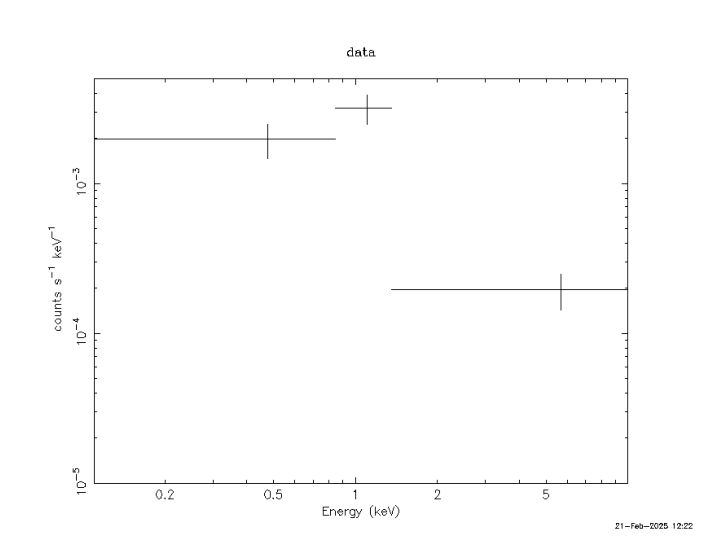

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              4.278281e+11     using 3 bins.

Tes

GammQ: A <=  0
GammQ: A <=  0


2e-06
32.7337      54525.1       0   2.86242e-15       3.01492   5.30039e-06
32.722       54043.4       0   1.04493e-15       3.00950   5.30414e-06
32.7045      49656.2       0   1.24125e-16       2.99431   5.26698e-06
32.5086      46485.1      -1   3.55528e-17       2.79833   4.67832e-06
29.4369      28009.5      -2   6.23753e-18       1.03261   1.58917e-06
22.685       2.94743e+06  -3   2.83682e-18      0.171102   7.64491e-07
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 2.83682e-18 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
6.09901      1.02324e+07  -4   2.83682e-18      0.245129   6.00995e-07
0.905228     4.98881e+06  -5   2.83682e-18      0.315438   7.48082e-07
0.636815     1.82283e+06  -6   2.83682e-18      0.328232   8.03389e-07
0.635428     56757.1      -7   2.83682e-18      0.329633   8.05953e-07
0.635405     538.922      -8   2.83682e-18      0.329827   8.06119e-07
***Warning:

(-0.5, 856.5, 660.5, -0.5)

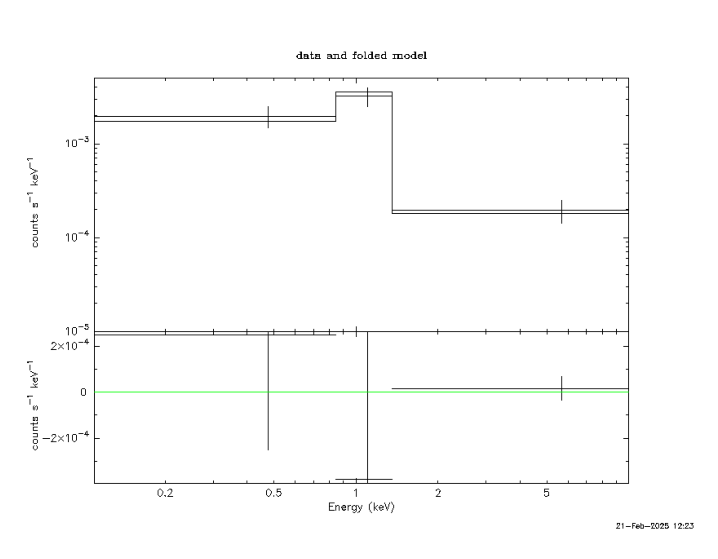

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.160822e+10     using 3 bins.

Test statistic : Chi-Squared              2.160822e+10     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
16.0627      1.27943      -2     0.0202340       3.41836   1.25614e-05
10.0406      322987       -3      0.117982       1.01528   4.00859e-05
0.768398     103692       -4     0.0489758       1.43780   4.80096e-05
0.0153802    39668.5      -

GammQ: A <=  0
GammQ: A <=  0


05
4.36764e-10  47.6298      -7     0.0827254       1.28937   5.29580e-05
 Variances and Principal Axes
                 1        2        3  
 5.5196E-11| -0.0002   0.0000   1.0000  
 2.6341E-03|  0.9946   0.1039   0.0002  
 7.8376E-01| -0.1039   0.9946  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   1.107e-02  -8.071e-02   4.326e-06
  -8.071e-02   7.753e-01  -3.712e-05
   4.326e-06  -3.712e-05   1.912e-09
------------------------------------

Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    8.27254E-02  +/-  0.105191     
   2    2   bremss     kT         keV      1.28937      +/-  0.880528     
   3    2   bremss     norm                5.29580E-05  +/-  4.37290E-05  
________________________________________________________________________


Fit statistic  : Chi-Squared                   4e-10     using 3 bins.

Tes

(-0.5, 857.5, 665.5, -0.5)

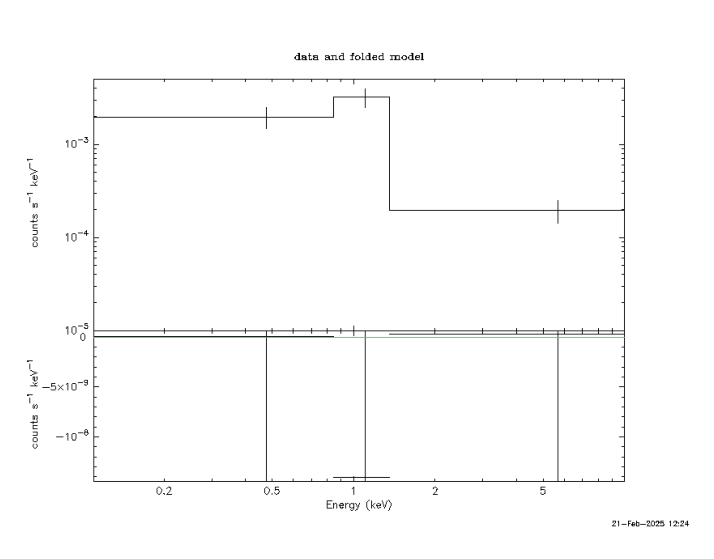

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.183809e+09     using 3 bins.

Test statistic : Chi-Squared              2.183809e+09     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
12.173       2.14478      -1       1.04335      0.678292   0.000154361
6.85278      17

GammQ: A <=  0
GammQ: A <=  0


(-0.5, 862.5, 665.5, -0.5)

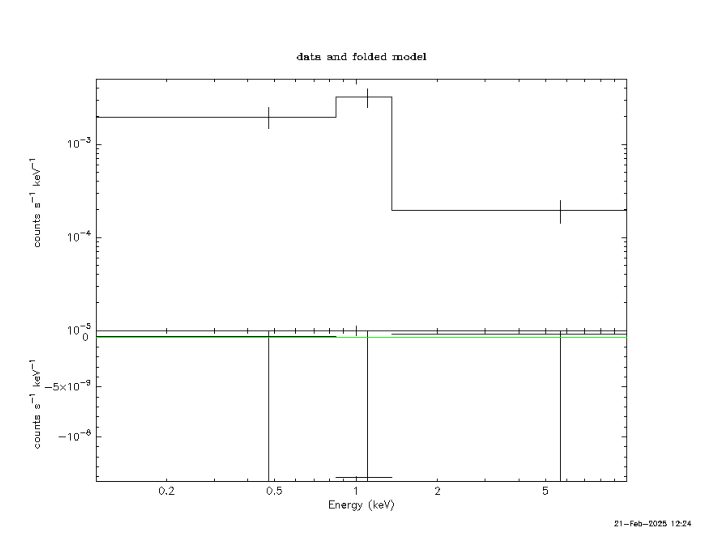

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.348018e+11     using 3 bins.

Test statistic : Chi-Squared              1.348018e+11     using 3 bins.
 Cannot calculate null hypothesis probability.
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
28.0604      0.930556      0      0.452284       1.12647   1.06136e-05
26.3156      97509        -1      0.132665       1.64119   7.74982e-06
5.49562      406006       -1     0.0492512       2.06248   1.61162e-05
1.08337      213758      

GammQ: A <=  0
GammQ: A <=  0


 calculate null hypothesis probability.


(-0.5, 860.5, 666.5, -0.5)

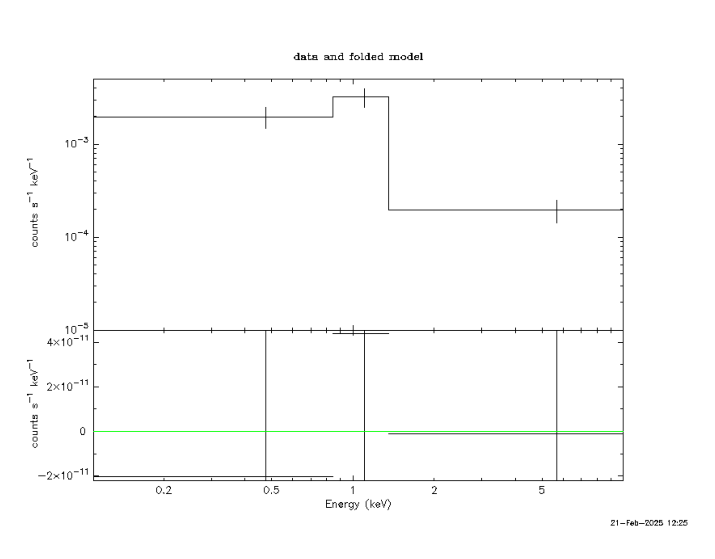

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.5643e-05 photons (8.4987e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
Flux = 8.4987e-14 # ergs/cm^2/s

### ESASky
There are two EPIC Stack pointers on two extremely close sources: one light green/blue and one blue. https://sky.esa.int/esasky/?target=52.38566666666666%20-28.617833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

**Green source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032932.2-283705
- IAU name : 4XMM J032932.3-283705
- RA : 03h 29m 32.247s
- DEC : -28° 37' 05.84"

**Blue source**

``EPIC Stack``
- Stack Catalogue name : 4XMMs J032933.0-283717
- IAU name : 4XMM J032933.1-283720
- RA : 03h 29m 33.006s
- DEC : -28° 37' 17.85""

### Luminosity
No distance or parallax is available on ESASky.